In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df = pd.read_csv('smartphones_cleaned_v6.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')
print(df.shape)
df.isnull().sum()

(980, 26)


brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

managing null values


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

# fill avg of rating for null values
df[['rating','processor_speed']] = df[['rating','processor_speed']].fillna(df[['rating','processor_speed']].mean())

# drop null values of processor brand
df.dropna(subset=['processor_brand','num_cores'], inplace=True)

df.isnull().sum()
# a = df['processor_speed'].unique()
# a



array([3.2       , 2.2       , 2.4       , 2.6       , 3.22      ,
       2.5       , 3.        , 2.3       , 2.85      , 2.        ,
       2.84      , 2.42721748, 2.65      , 2.9       , 2.36      ,
       1.8       , 3.1       , 2.05      , 3.05      , 1.82      ,
       2.8       , 1.6       , 1.3       , 2.73      , 2.7       ,
       1.5       , 2.96      , 1.4       , 2.35      , 2.37      ,
       3.13      , 1.99      , 2.86      , 1.95      , 2.1       ,
       1.2       ])

plot a chart showing avg rating of phone brands and find the lowest rated brands and highest rated brands

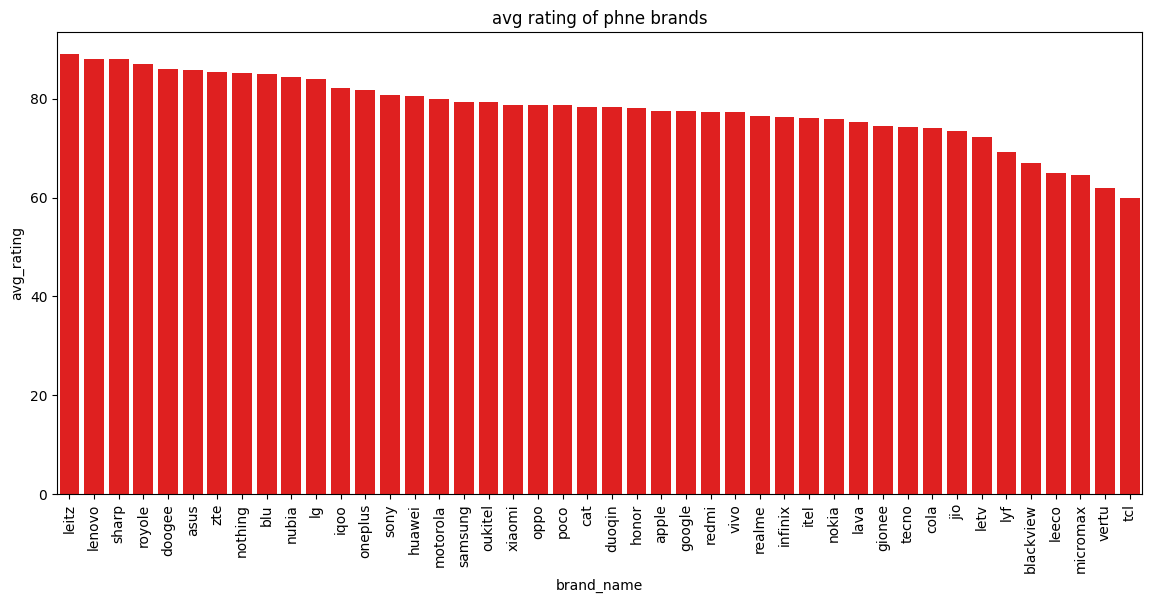

top brands =  brand_name
leitz     89.0
lenovo    88.0
sharp     88.0
Name: rating, dtype: float64

 lowest rated brands =  brand_name
tcl         60.000000
vertu       62.000000
micromax    64.666667
Name: rating, dtype: float64


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

# fill avg of rating for null values
df[['rating','processor_speed']] = df[['rating','processor_speed']].fillna(df[['rating','processor_speed']].mean())

# drop null values of processor brand
df.dropna(subset=['processor_brand','num_cores'], inplace=True)

# plot a chart showing avg rating of phone brands

grpby_brand = df.groupby('brand_name')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
# plt.bar(grpby_brand.index, grpby_brand.values )

sns.barplot(x=grpby_brand.index, y=grpby_brand.values, color='r')
plt.xlabel('brand_name')
plt.ylabel('avg_rating')
plt.title('avg rating of phne brands')
plt.xticks(rotation= 'vertical')
plt.show()
# grpby_brand['rating'].mean().plot(kind='bar')



# getting the most rated 3 brands also lowest rated 3 brands
top3 = grpby_brand.nlargest(3)
lowest3 = grpby_brand.nsmallest(3)
print('top brands = ' ,top3)
print('\n lowest rated brands = ',lowest3)

relation bw price and processor speed using scatter plot

<Figure size 1400x600 with 0 Axes>

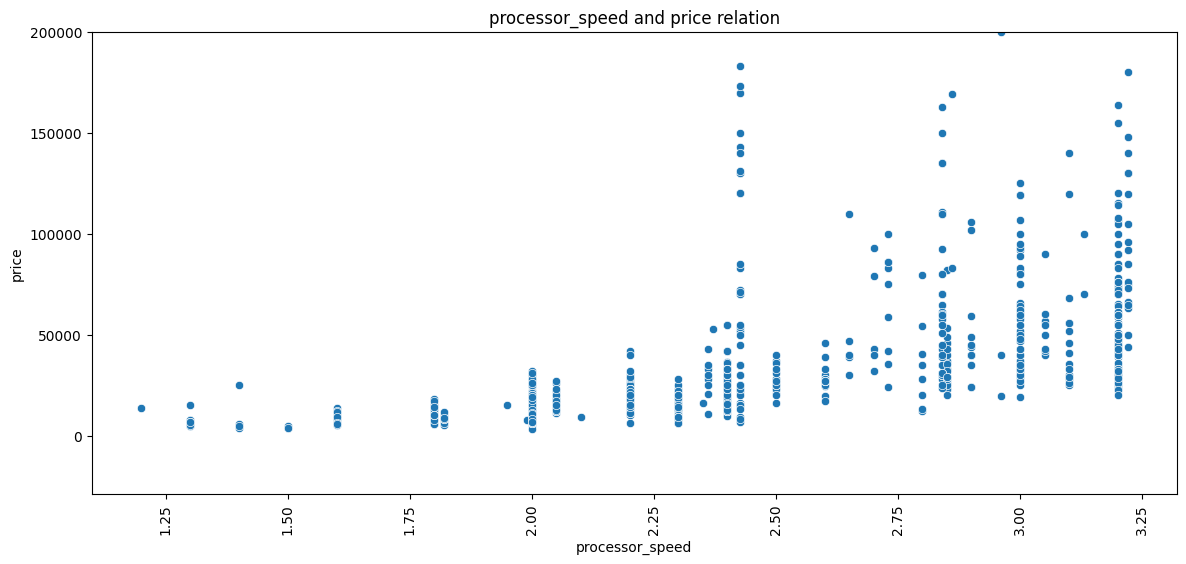

In [84]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

# fill avg of rating for null values
df[['rating','processor_speed']] = df[['rating','processor_speed']].fillna(df[['rating','processor_speed']].mean())

# drop null values of processor speed
df.dropna(subset=['processor_speed'], inplace=True)

# plot a scatter chart showing processor_speed and price relation

plt.figure(figsize=(14,6))
# plt.bar(grpby_brand.index, grpby_brand.values )
sns.scatterplot(x= df['processor_speed'], y= df['price'])
plt.xlabel('processor_speed')
plt.ylabel('price')
plt.title('processor_speed and price relation')
plt.xticks(rotation= 'vertical')
plt.ylim(top= 200000 )
plt.show()

when the processor speed increases the price also increases

which are the top selling **brands**

32520.504081632655
3499
650000


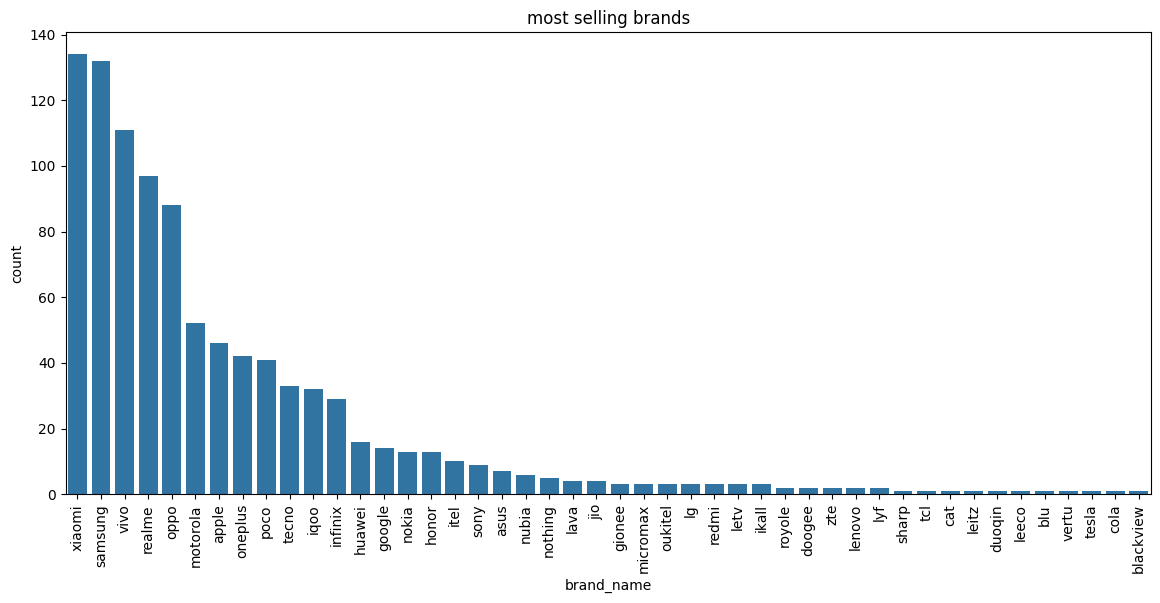

In [95]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

# fill avg of rating for null values
df[['rating','processor_speed']] = df[['rating','processor_speed']].fillna(df[['rating','processor_speed']].mean())


print(df.price.mean())
print(df.price.min())
print(df.price.max())


# plot a barchart showing most selling brand
f_brand = df.groupby(by='brand_name')
print(f_brand)


plt.figure(figsize=(14,6))
# plt.bar(grpby_brand.index, grpby_brand.values )


sns.countplot(x= df['brand_name'], order = df['brand_name'].value_counts().index)
plt.title('most selling brands')
plt.xticks(rotation= 'vertical')
plt.show()

xiaomi, samsung and vivo are the most selling brands

which no. of cameras are the highest selling phones

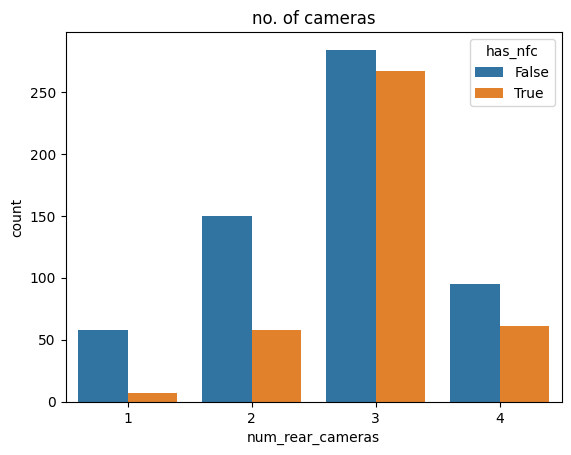

In [118]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')


# plot most sold camera type
sns.countplot(data=df, x='num_rear_cameras', hue= 'has_nfc')
plt.title('no. of cameras')
plt.show()

3 rear camera models are sold mostly.

plot histogram on processor brands. which processor brand sold mostly

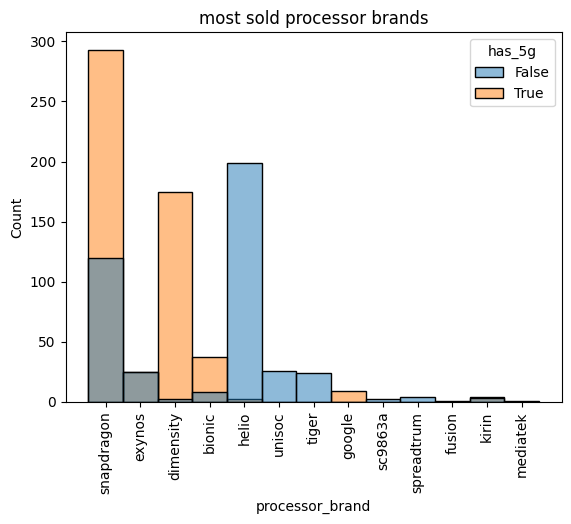

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')


# plot histogram
sns.histplot(data=df, x='processor_brand', hue= 'has_5g')
plt.title('most sold processor brands')
plt.xticks(rotation= 'vertical')
plt.show()

no cameras and brand relation

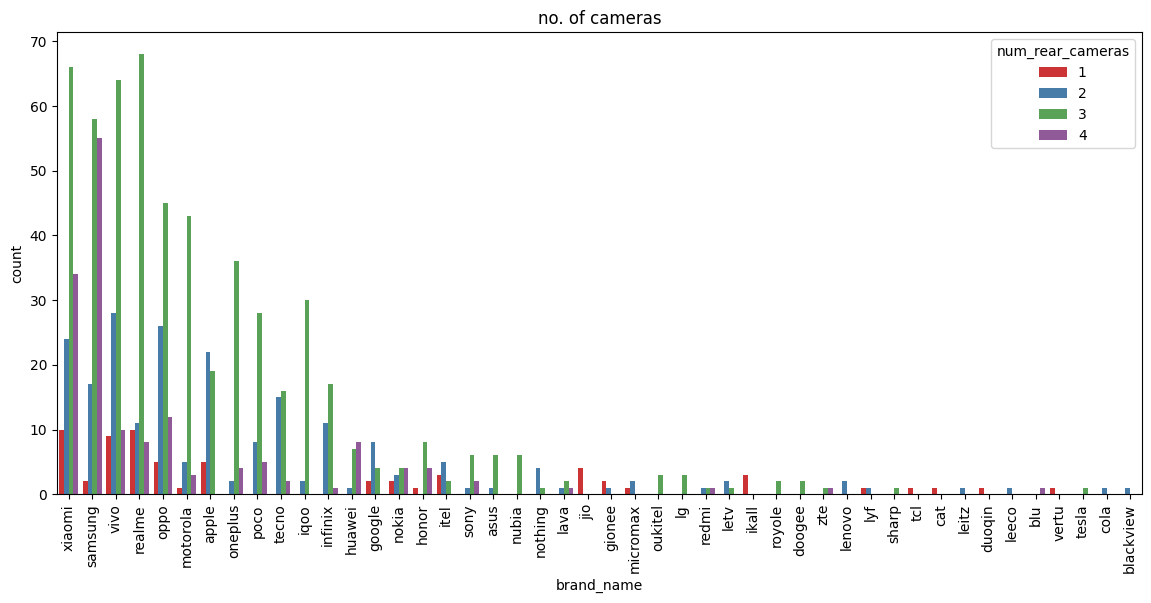

In [168]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

# plot most sold camera type
plt.figure(figsize=(14,6))
sns.countplot(data= df, x= 'brand_name', hue= 'num_rear_cameras' , palette= 'Set1', order= df['brand_name'].value_counts().index)
plt.title('no. of cameras')
plt.xticks(rotation= 'vertical')
plt.show()


xiaomi ,samsng and vivo makes the multiple no. of cameras more

a relation between battery capacity and price

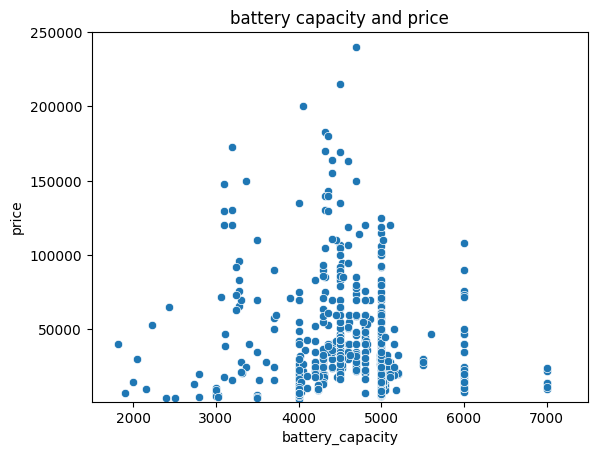

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')
df.isnull().sum()

#removing null values
df.dropna(subset=['battery_capacity'], inplace=True)

sns.scatterplot(data= df, x= 'battery_capacity', y='price')
plt.title('battery capacity and price')
plt.xlim(1500,7500)
plt.ylim(1500,250000)
plt.show()


price distribution histogram

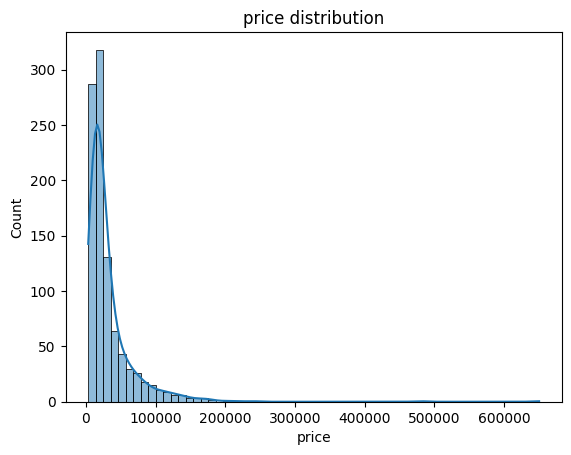

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smartphones_cleaned_v6.csv')

sns.histplot(data= df, x= 'price', bins= 60, kde=True)
plt.title('price distribution')
plt.show()